In [43]:
import sys
from pathlib import Path

sys.path.append(r"/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from data_analysis.data_fetcher.data_fetcher_class import DataFetcher
from data_collection.consts import  DB_PARAMS

In [44]:
fetcher = DataFetcher(DB_PARAMS)

Available regressors:
 - avg_default_verbolizer
 - avg_shrink_verbolizer
 - eps_surprise
 - f_size
 - full_list_default_verbolizer
 - full_list_shrink_verbolizer
 - hv_orig_score
 - lm_orig_score
 - max_abs_default
 - max_abs_shrink
 - max_default_verbolizer
 - max_shrink_verbolizer
 - md_hv1
 - md_hv2
 - md_hv3
 - md_lm1
 - md_lm2
 - md_lm3
 - min_default_verbolizer
 - min_shrink_verbolizer
 - stretch_default
 - stretch_shrink
Available sectors:
 - Technology (92)
 - Industrials (86)
 - Financial Services (85)
 - Healthcare (66)
 - Consumer Cyclical (58)
 - Consumer Defensive (40)
 - Real Estate (32)
 - Utilities (32)
 - Energy (30)
 - Basic Materials (23)
 - Communication Services (22)


/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:132: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:107: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [45]:
df_q = fetcher.fetch_data(
    regressors=['stretch_default'],
    report_filters={'report_type' : ['10-Q']}
    )

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:164: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Expanding list regressor 'stretch_default' into 107 columns...


/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:211: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)


In [46]:
avgs = {}

for col in df_q.columns:
    if col.startswith('segment_'):
        avgs[col] = df_q[col].mean()

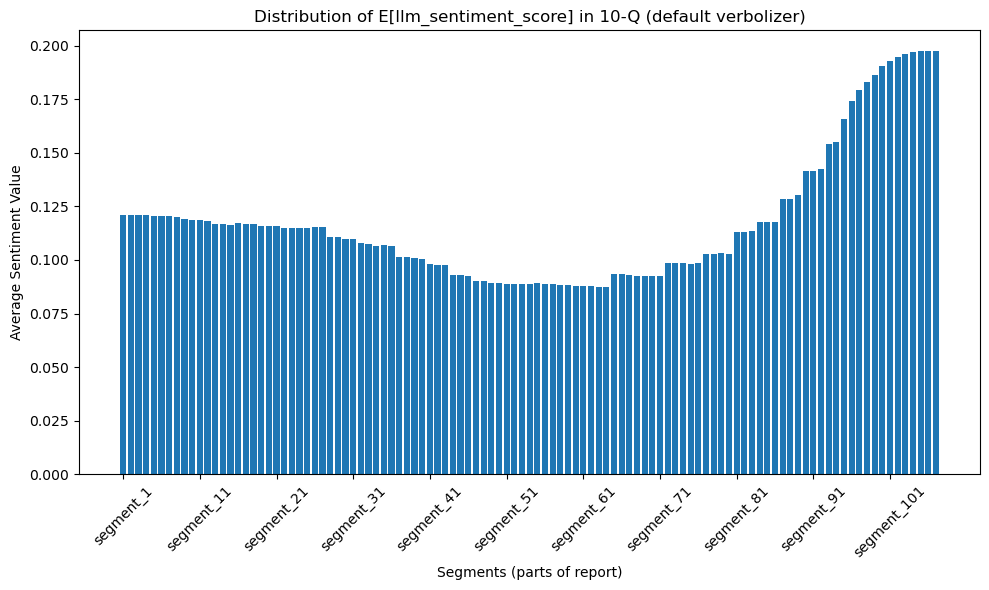

In [47]:
keys = list(avgs.keys())
values = list(avgs.values())

plt.figure(figsize=(10, 6))
plt.bar(keys, values)

# Labeling
plt.xlabel('Segments (parts of report)')
plt.ylabel('Average Sentiment Value')
plt.title('Distribution of E[llm_sentiment_score] in 10-Q (default verbolizer)')
plt.xticks(
    ticks=[i for i in range(len(keys)) if i % 10 == 0],
    labels=[keys[i] for i in range(len(keys)) if i % 10 == 0],
    rotation=45,
    fontsize=10
)  
plt.tight_layout()

# Display the plot
plt.show()

In [48]:
abs_avgs = {}

for col in df_q.columns:
    if col.startswith('segment_'):
        abs_avgs[col] = abs(df_q[col]).mean()

dif_avgs = {}

for seg in avgs:
    dif_avgs[seg] = avgs[seg] - abs_avgs[seg] 

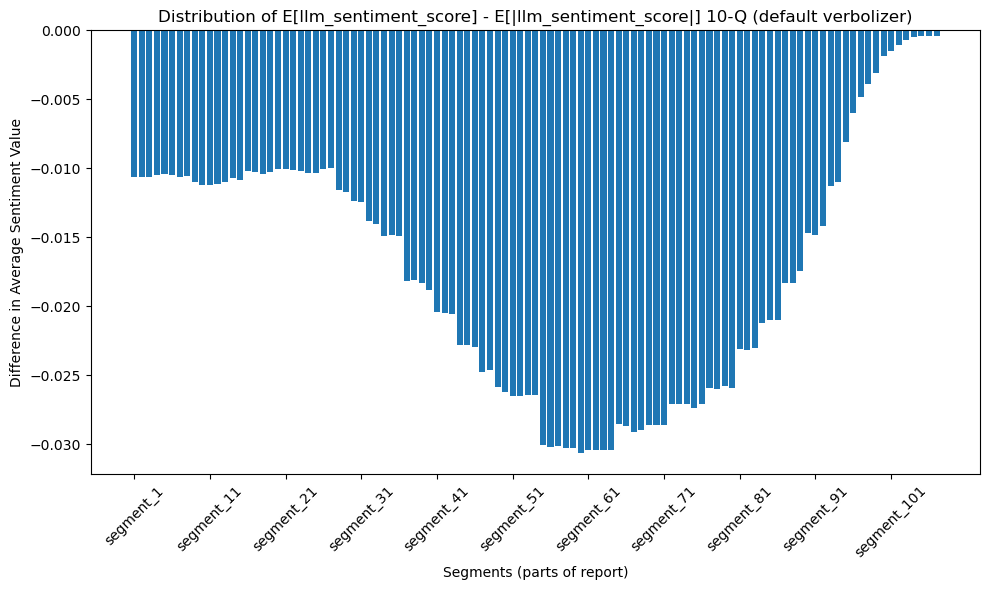

In [50]:
keys = list(dif_avgs.keys())
values = list(dif_avgs.values())
plt.figure(figsize=(10, 6))
plt.bar(keys, values)

# Labeling
plt.xlabel('Segments (parts of report)')
plt.ylabel('Difference in Average Sentiment Value')
plt.title('Distribution of E[llm_sentiment_score] - E[|llm_sentiment_score|] 10-Q (default verbolizer)')
plt.xticks(
    ticks=[i for i in range(len(keys)) if i % 10 == 0],
    labels=[keys[i] for i in range(len(keys)) if i % 10 == 0],
    rotation=45,
    fontsize=10
)  
plt.tight_layout()

# Display the plot
plt.show()

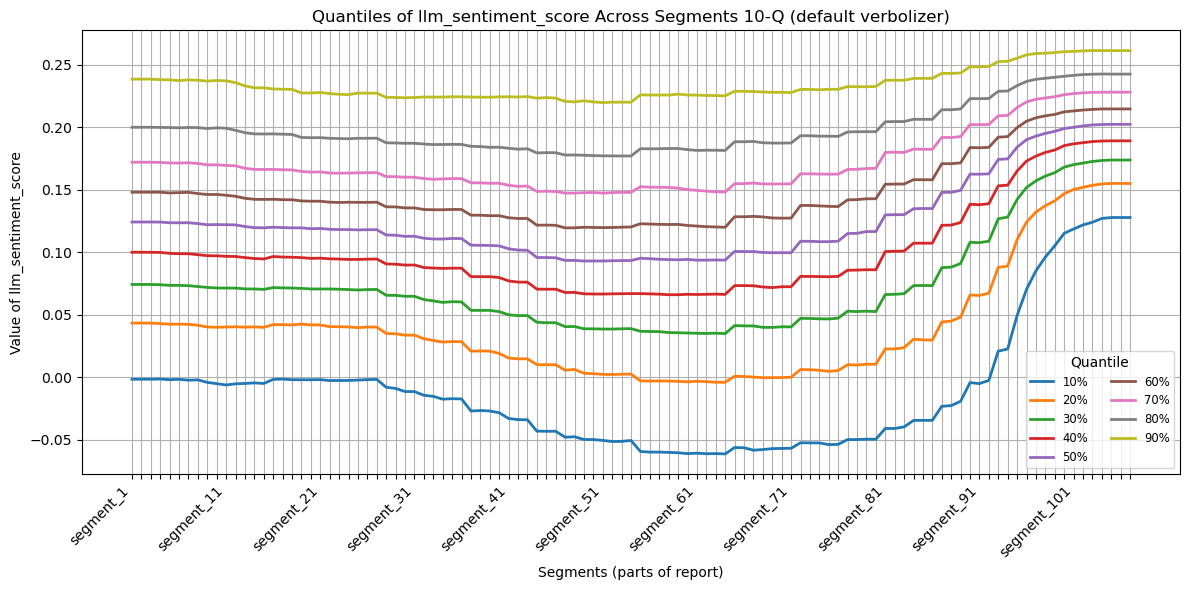

In [51]:
# Step 1: Extract and convert relevant columns
segment_cols = [col for col in df_q.columns if col.startswith('segment_')]
df_segment = df_q[segment_cols].astype(float)  # Force float type

# Step 2: Define quantile levels
quantile_levels = np.linspace(0.1, 0.9, 9)  # drop 100%
index_labels = [f'{int(q * 100)}%' for q in quantile_levels]

quantile_matrix = pd.DataFrame(
    [df_segment.quantile(q).values for q in quantile_levels],
    index=index_labels,
    columns=segment_cols
)

# Step 4: Plot each row (quantile line) across all columns
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Better categorical contrast

for i, (q_label, row) in enumerate(quantile_matrix.iterrows()):
    plt.plot(segment_cols, row.values, label=q_label, color=colors[i], linewidth=2)

plt.xlabel('Segments (parts of report)')
plt.ylabel('Value of llm_sentiment_score')
plt.title('Quantiles of llm_sentiment_score Across Segments 10-Q (default verbolizer)')
segment_labels = segment_cols
xtick_locs = list(range(len(segment_labels)))
xtick_labels = [label if i % 10 == 0 else '' for i, label in enumerate(segment_labels)]
plt.xticks(ticks=xtick_locs, labels=xtick_labels, rotation=45, ha='right')
plt.legend(title='Quantile', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

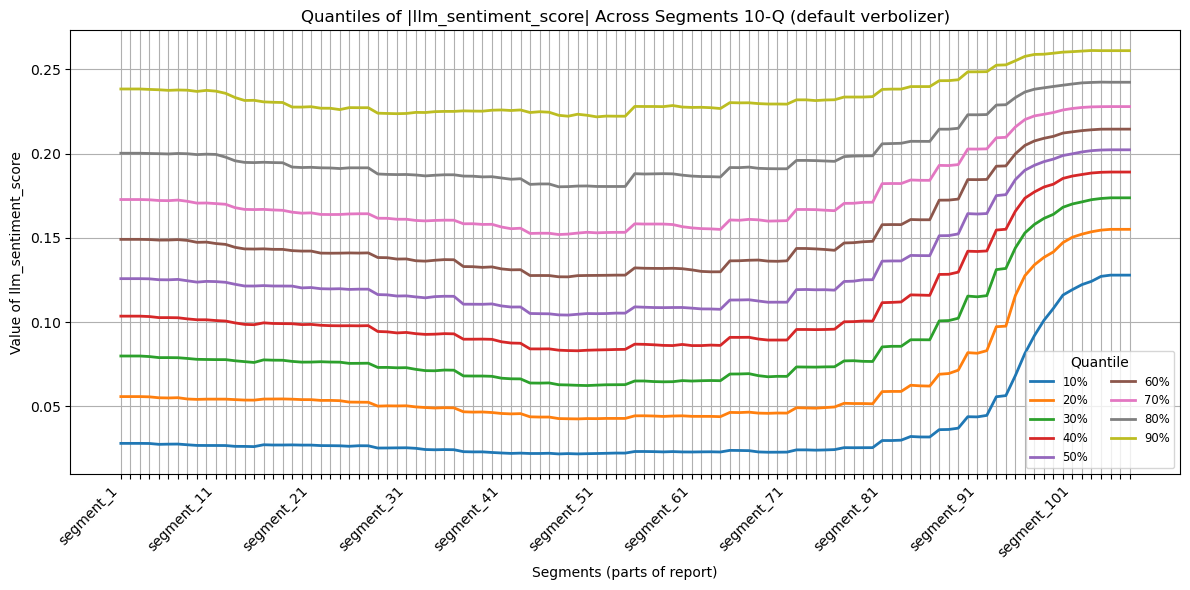

In [52]:
# Step 1: Extract and convert relevant columns
segment_cols = [col for col in df_q.columns if col.startswith('segment_')]
df_segment = df_q[segment_cols].astype(float)  # Force float type

# Step 2: Define quantile levels
quantile_levels = np.linspace(0.1, 0.9, 9)  # drop 100%
index_labels = [f'{int(q * 100)}%' for q in quantile_levels]

quantile_matrix = pd.DataFrame(
    [abs(df_segment).quantile(q).values for q in quantile_levels],
    index=index_labels,
    columns=segment_cols
)

# Step 4: Plot each row (quantile line) across all columns
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Better categorical contrast

for i, (q_label, row) in enumerate(quantile_matrix.iterrows()):
    plt.plot(segment_cols, row.values, label=q_label, color=colors[i], linewidth=2)

plt.xlabel('Segments (parts of report)')
plt.ylabel('Value of llm_sentiment_score')
plt.title('Quantiles of |llm_sentiment_score| Across Segments 10-Q (default verbolizer)')
segment_labels = segment_cols
xtick_locs = list(range(len(segment_labels)))
xtick_labels = [label if i % 10 == 0 else '' for i, label in enumerate(segment_labels)]
plt.xticks(ticks=xtick_locs, labels=xtick_labels, rotation=45, ha='right')
plt.legend(title='Quantile', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
df_k = fetcher.fetch_data(
    regressors=['stretch_default'],
    report_filters={'report_type' : ['10-K']}
    )

/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:164: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Expanding list regressor 'stretch_default' into 107 columns...


/home/maxim-shibanov/Projects_Py/Risk-and-return-prediction-with-LLM/src/data_analysis/data_fetcher/data_fetcher_class.py:211: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, conn)


In [54]:
avgs = {}

for col in df_k.columns:
    if col.startswith('segment_'):
        avgs[col] = df_k[col].mean()

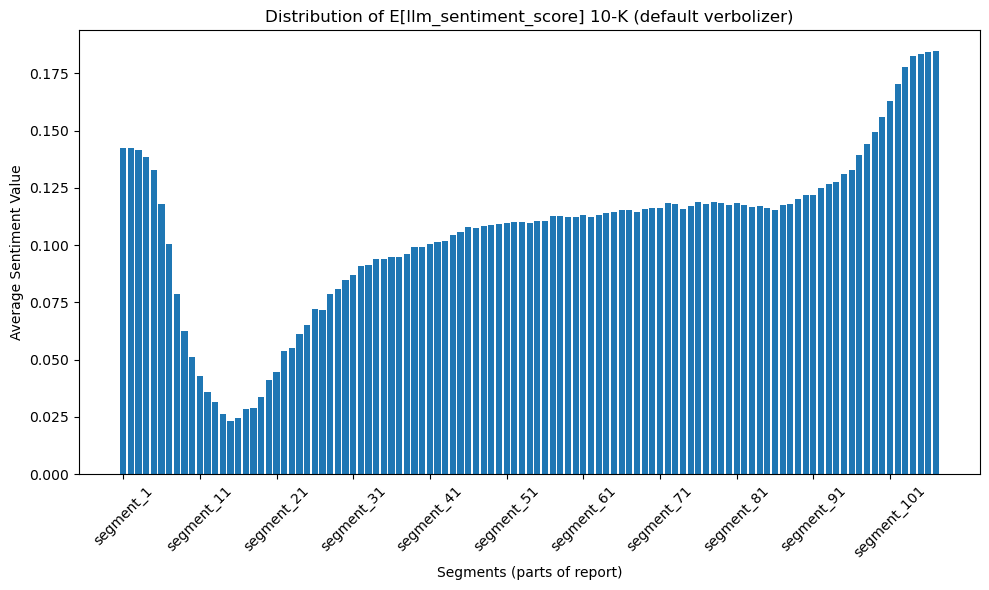

In [55]:
keys = list(avgs.keys())
values = list(avgs.values())

plt.figure(figsize=(10, 6))
plt.bar(keys, values)

# Labeling
plt.xlabel('Segments (parts of report)')
plt.ylabel('Average Sentiment Value')
plt.title('Distribution of E[llm_sentiment_score] 10-K (default verbolizer)')
plt.xticks(
    ticks=[i for i in range(len(keys)) if i % 10 == 0],
    labels=[keys[i] for i in range(len(keys)) if i % 10 == 0],
    rotation=45,
    fontsize=10
)  
plt.tight_layout()

# Display the plot
plt.show()

In [56]:
abs_avgs = {}

for col in df_k.columns:
    if col.startswith('segment_'):
        abs_avgs[col] = abs(df_k[col]).mean()

dif_avgs = {}

for seg in avgs:
    dif_avgs[seg] = avgs[seg] - abs_avgs[seg] 

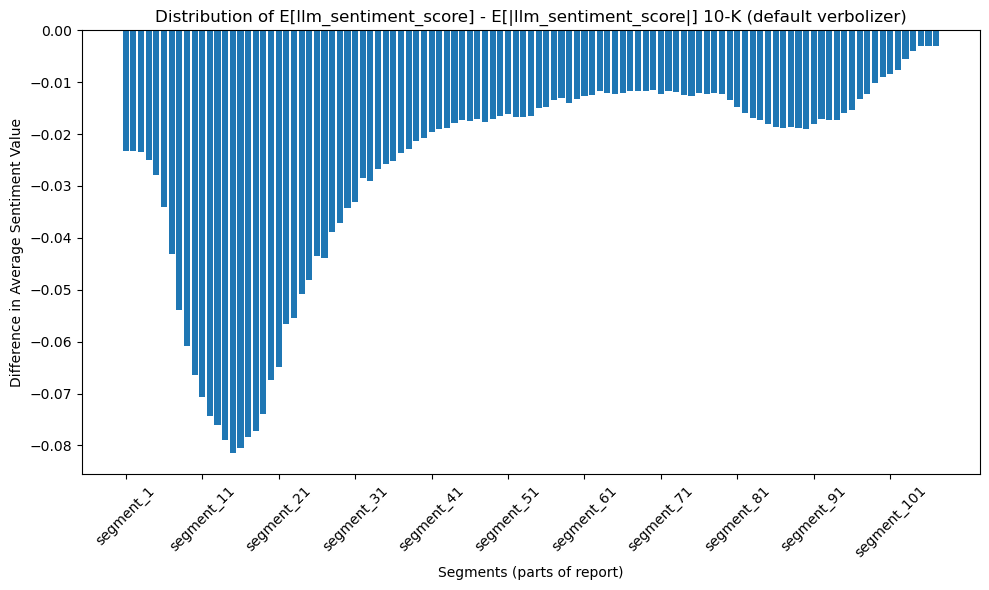

In [57]:
keys = list(dif_avgs.keys())
values = list(dif_avgs.values())
plt.figure(figsize=(10, 6))
plt.bar(keys, values)

# Labeling
plt.xlabel('Segments (parts of report)')
plt.ylabel('Difference in Average Sentiment Value')
plt.title('Distribution of E[llm_sentiment_score] - E[|llm_sentiment_score|] 10-K (default verbolizer)')
plt.xticks(
    ticks=[i for i in range(len(keys)) if i % 10 == 0],
    labels=[keys[i] for i in range(len(keys)) if i % 10 == 0],
    rotation=45,
    fontsize=10
)  
plt.tight_layout()

# Display the plot
plt.show()

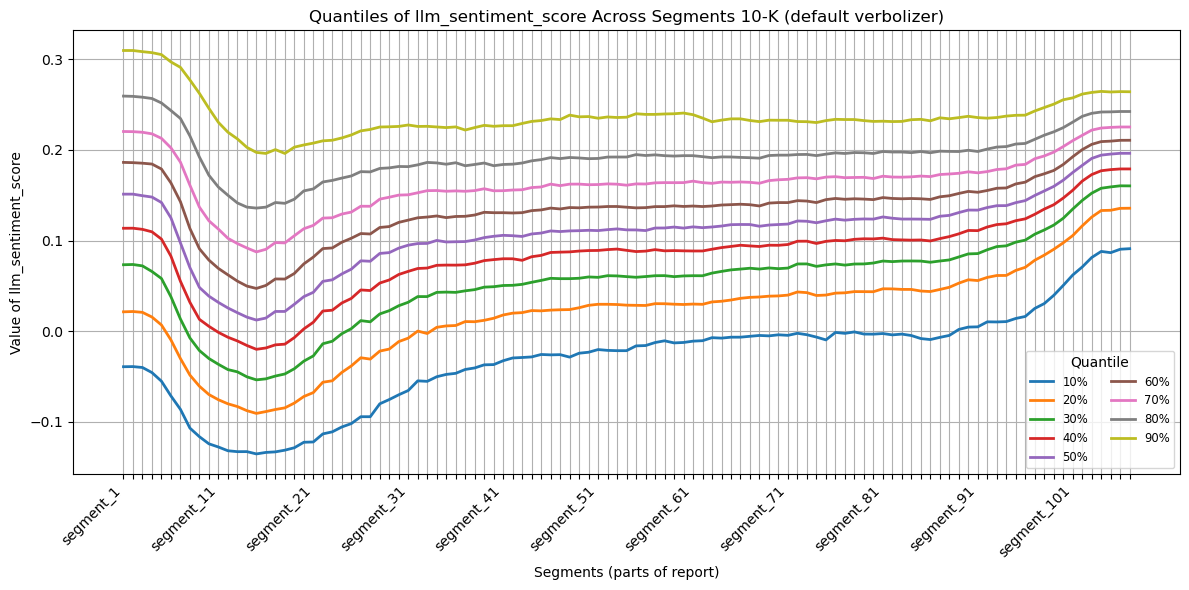

In [58]:
# Step 1: Extract and convert relevant columns
segment_cols = [col for col in df_k.columns if col.startswith('segment_')]
df_segment = df_k[segment_cols].astype(float)  # Force float type

# Step 2: Define quantile levels
quantile_levels = np.linspace(0.1, 0.9, 9)  # drop 100%
index_labels = [f'{int(q * 100)}%' for q in quantile_levels]

quantile_matrix = pd.DataFrame(
    [df_segment.quantile(q).values for q in quantile_levels],
    index=index_labels,
    columns=segment_cols
)

# Step 4: Plot each row (quantile line) across all columns
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Better categorical contrast

for i, (q_label, row) in enumerate(quantile_matrix.iterrows()):
    plt.plot(segment_cols, row.values, label=q_label, color=colors[i], linewidth=2)

plt.xlabel('Segments (parts of report)')
plt.ylabel('Value of llm_sentiment_score')
plt.title('Quantiles of llm_sentiment_score Across Segments 10-K (default verbolizer)')
segment_labels = segment_cols
xtick_locs = list(range(len(segment_labels)))
xtick_labels = [label if i % 10 == 0 else '' for i, label in enumerate(segment_labels)]
plt.xticks(ticks=xtick_locs, labels=xtick_labels, rotation=45, ha='right')
plt.legend(title='Quantile', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

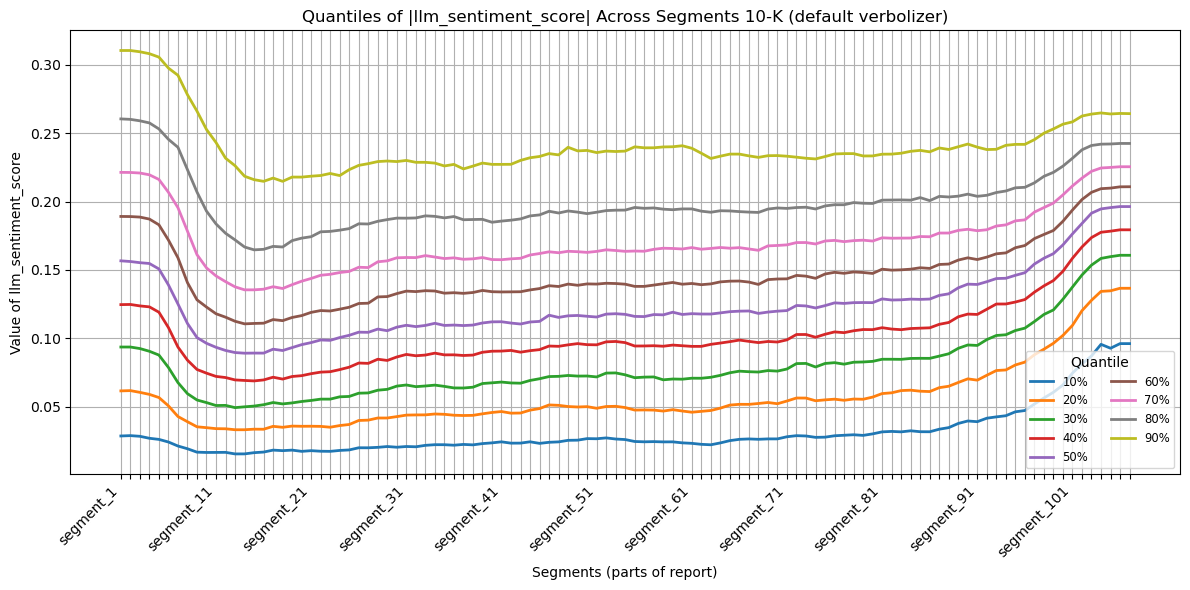

In [59]:
# Step 1: Extract and convert relevant columns
segment_cols = [col for col in df_k.columns if col.startswith('segment_')]
df_segment = df_k[segment_cols].astype(float)  # Force float type

# Step 2: Define quantile levels
quantile_levels = np.linspace(0.1, 0.9, 9)  # drop 100%
index_labels = [f'{int(q * 100)}%' for q in quantile_levels]

quantile_matrix = pd.DataFrame(
    [abs(df_segment).quantile(q).values for q in quantile_levels],
    index=index_labels,
    columns=segment_cols
)

# Step 4: Plot each row (quantile line) across all columns
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # Better categorical contrast

for i, (q_label, row) in enumerate(quantile_matrix.iterrows()):
    plt.plot(segment_cols, row.values, label=q_label, color=colors[i], linewidth=2)

plt.xlabel('Segments (parts of report)')
plt.ylabel('Value of llm_sentiment_score')
plt.title('Quantiles of |llm_sentiment_score| Across Segments 10-K (default verbolizer)')
segment_labels = segment_cols
xtick_locs = list(range(len(segment_labels)))
xtick_labels = [label if i % 10 == 0 else '' for i, label in enumerate(segment_labels)]
plt.xticks(ticks=xtick_locs, labels=xtick_labels, rotation=45, ha='right')
plt.legend(title='Quantile', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()